# RUN A Mutivariate Analysis and Plot the data using Seaborn and Test for Significance using two sample independent t test 

# Imports 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import PySimpleGUI as sg
sg.theme('darkteal4')
import pandas as pd
import scipy.stats as ss
# if needed
#import os

## Initialize the variables HR is Horizontal ruler

In [2]:
HR='_'*60

# N_value are the number of samples or observations

In [3]:
N_value=17

# DPI is the resolution of graphs

In [4]:
DPI=300


# NAME OF 2 Groups

In [5]:
Group1_NAME="Submerged growth Aquatica"
Group2_NAME="Submerged growth Plaudis"

SUSPECTED OR EXPECTED MEAN OF 2 groups 1 and 2 and ranges of 2 groups

In [6]:
MEAN1=10.5
MEAN2=4.3
RNG1=12
RNG2=8

# INITIALIZE Mutivariate array using above initial conditions

In [7]:
mean = [MEAN1, MEAN2]
matrix =[[RNG1, RNG2],
               [ RNG2, RNG1]]
#g is x, y tuple 
samples_2= np.random.default_rng().multivariate_normal(mean, matrix, N_value).T

# Create Pandas data frame using samples in samples_2 above

In [8]:
df=pd.DataFrame({Group1_NAME:samples_2[0],
 Group2_NAME:samples_2[1]}, index=np.arange(1,N_value+1,1))

# SET GRID IN SEABORN

In [9]:
sns.set_style("darkgrid")

# Plot the table
## # Save the figure Plotted using a RANDOM String if you call plot before you save u get a blank screen

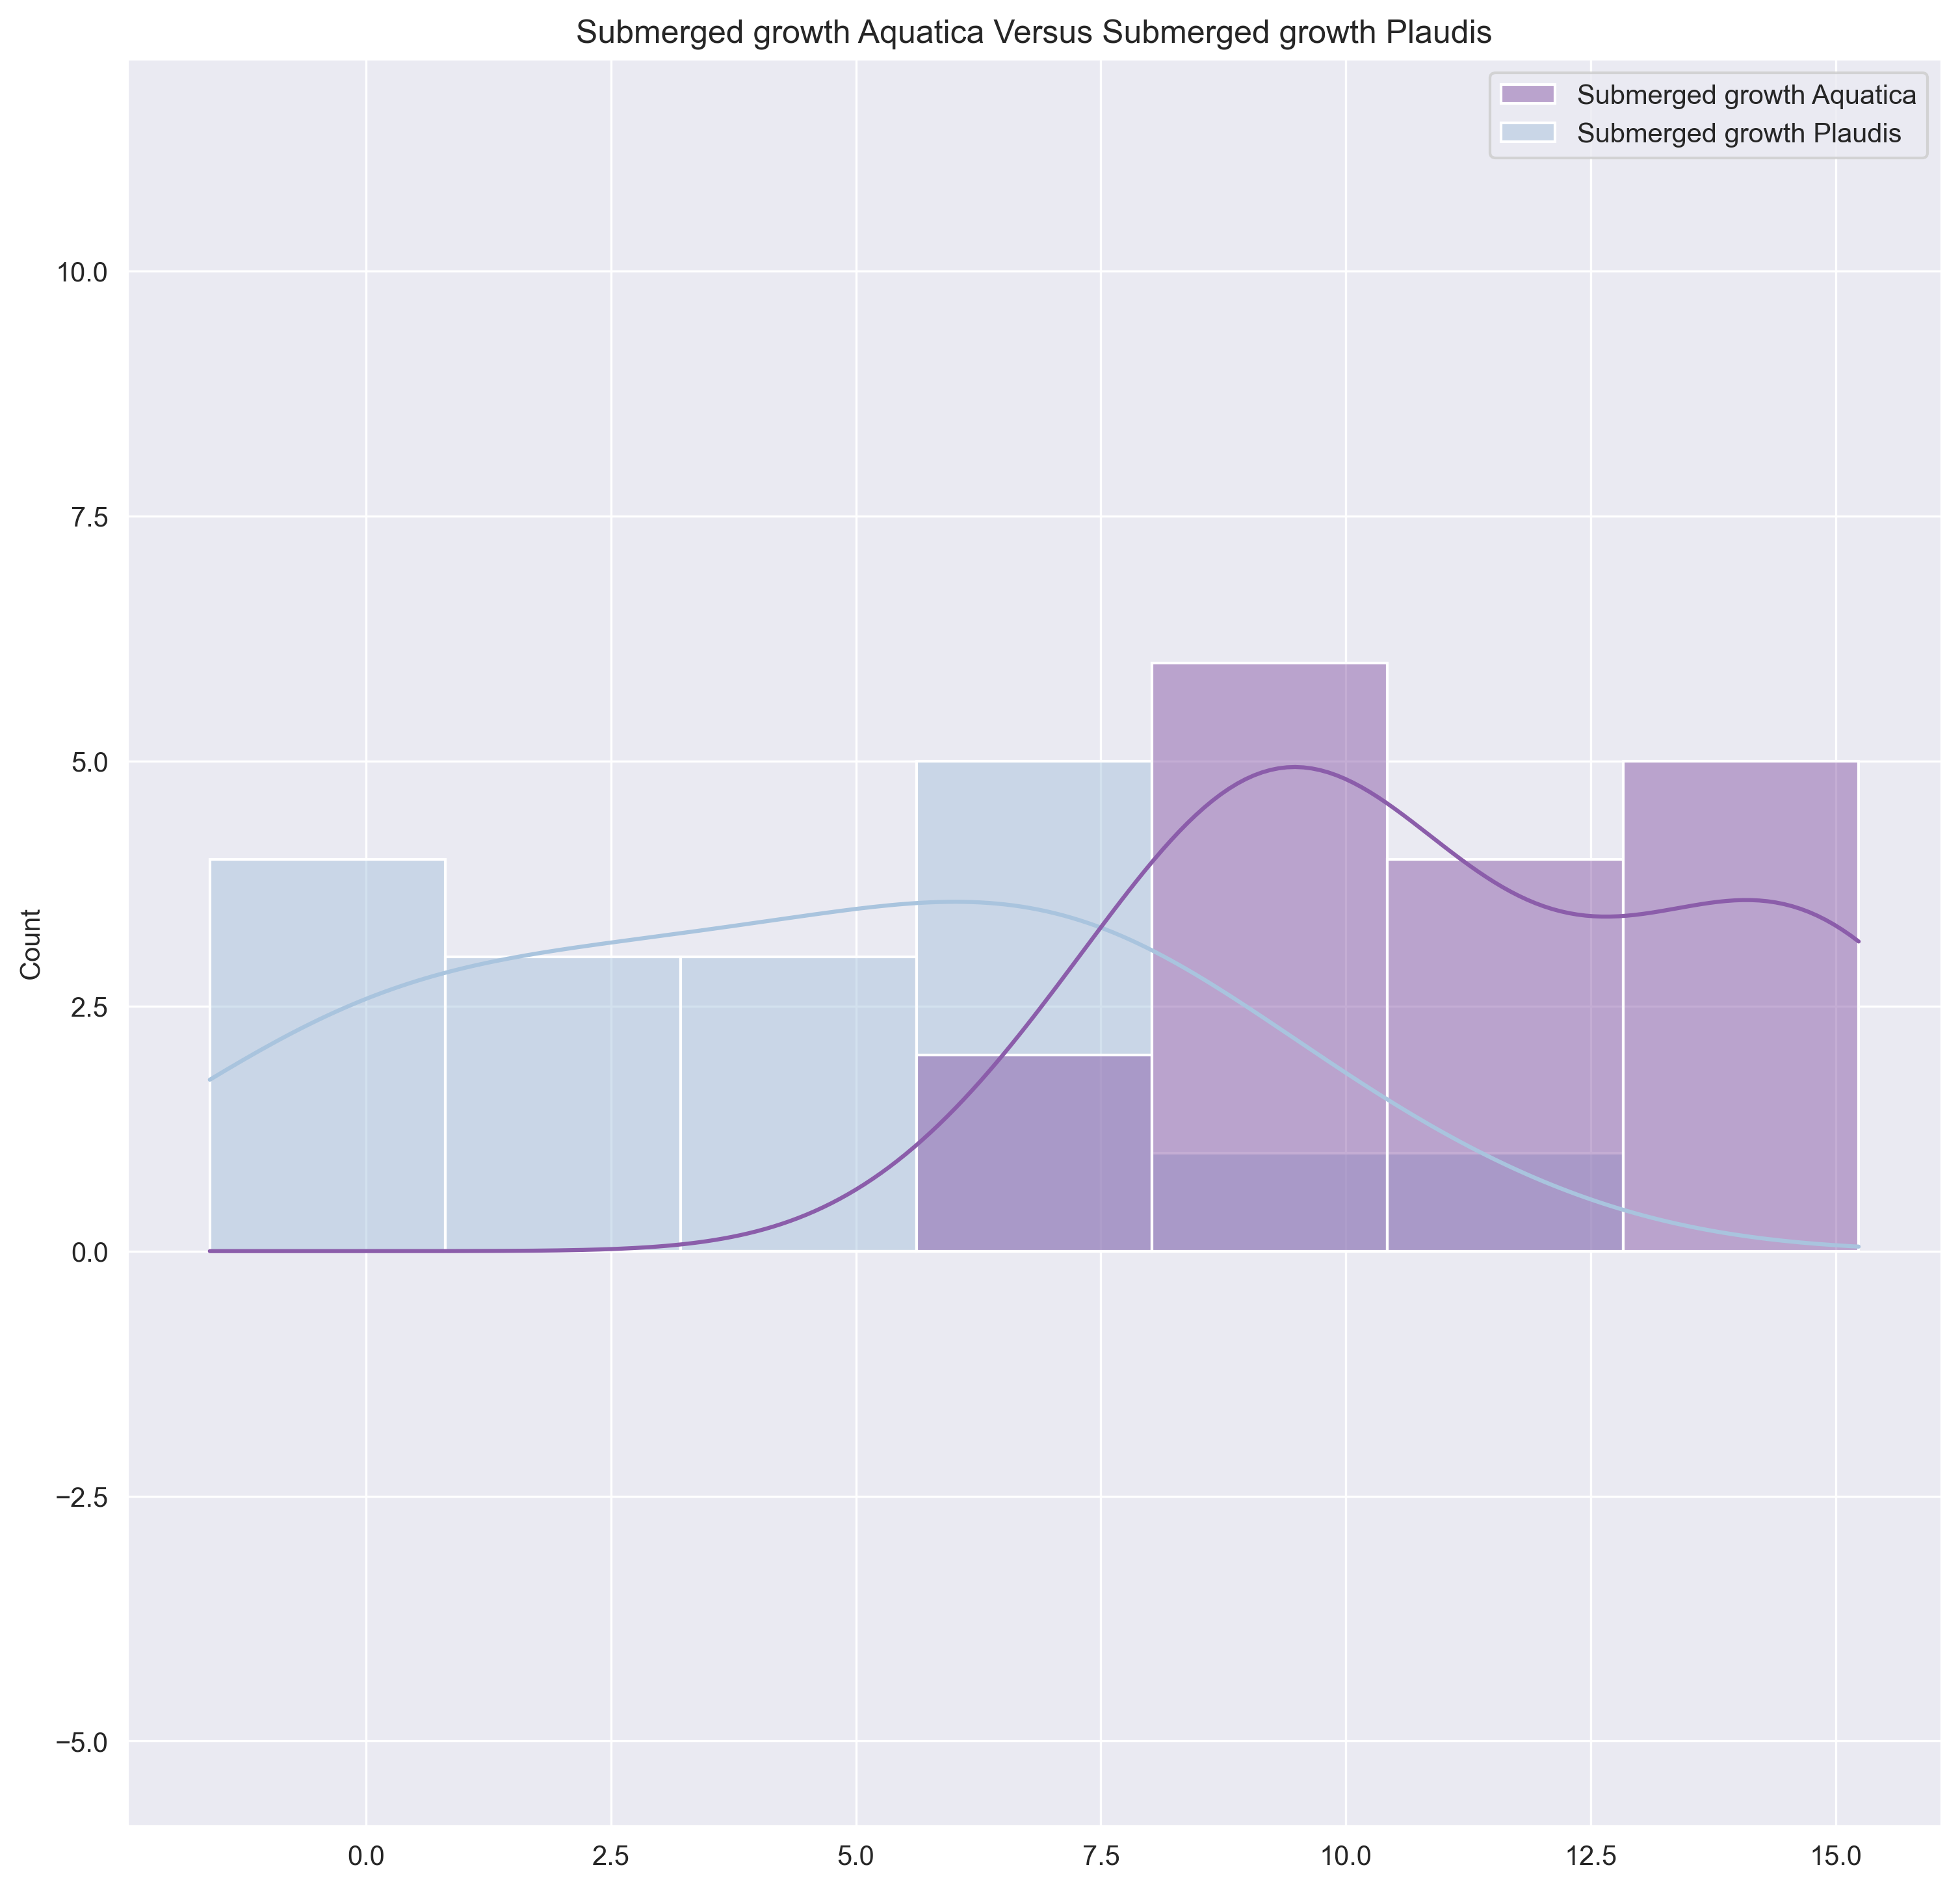

In [10]:
plt.figure(figsize=(12,12), dpi=DPI)
sns.histplot(data=df, kde=True, palette='BuPu_r')
plt.axis('equal')
TITLE1=f'{Group1_NAME} Versus {Group2_NAME}'
plt.title(f'{Group1_NAME} Versus {Group2_NAME}')
#plt.show()
ri = np.random.randint(11111,99999)
numstr = str(ri)
#plt.savefig(f"Plot{numstr}.png", dpi=DPI)
if (sg.popup_yes_no("Save the Graph?")=='Yes'): 
    plt.savefig(TITLE1+numstr+'.png')
    plt.savefig(TITLE1+numstr+'.svg')
plt.show()


# RUN THE SCIPY T test of two groups

In [11]:
static, pvalue=ss.ttest_ind(samples_2[0], samples_2[1], equal_var=False)

# Check significant P value and Test static
### Round the value

In [12]:
pvalue_rounded= np.round(pvalue,4)
static_rounded= np.round(static, 4)
if pvalue<0.5: sig=f"p={pvalue_rounded} is Statistically signigicant"
else: sig=f"p={pvalue_rounded} is NOT Statistically signigicant"
result=f"Calculated t static is {static_rounded} and {sig}."
sg.popup(result, title="Result", modal=True)

'OK'

# # Save the table and CSV for future use

In [13]:

answer=sg.popup_yes_no("Save Table as CSV and result as TXT?", title="Save data" , modal=True)
 
if answer=='Yes': 
     sg.popup('Saving this data as table',title="Wait",auto_close="7")
     df2=np.round(df,2)
     df2.to_csv(f"Table1{numstr}.csv")
     with open(f'T_test_result_{numstr}.txt','w') as fout:
     	
     	fout.write(df.to_string())
     	fout.write('\n')
     	fout.write(HR)
     	fout.write('\n')

#     	fout.write(desc1)
#     	fout.write('\n')
#     	fout.write(HR)
#     	fout.write('\n')
#     	fout.write(desc2)
#     	fout.write('\n')
#     	fout.write(HR)     	
#     	fout.write('\n')
     	fout.write(result)
     	fout.write('\n')
     	fout.write(HR)
     	fout.close()
# sg.popup("Graphing", title="Graph", auto_close="4")
# plt.show()